In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing Libraries**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Preprocessing


##### Loading Image data set using keras for training


In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image preprocessing


In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
#x->data,y->labels
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 98.75  93.75  94.75]
   [ 98.75  93.75  94.75]
   [100.5   95.    96.5 ]
   ...
   [ 84.5   76.5   78.5 ]
   [ 73.75  66.25  67.75]
   [ 77.    69.    71.  ]]

  [[199.   193.   195.  ]
   [198.5  192.5  194.5 ]
   [200.   194.   196.  ]
   ...
   [157.   148.   151.  ]
   [147.25 138.25 141.25]
   [146.   137.   140.  ]]

  [[204.75 198.75 200.75]
   [203.25 197.25 199.25]
   [204.25 198.25 200.25]
   ...
   [151.   142.   145.  ]
   [158.5  149.5  152.5 ]
   [152.   143.   146.  ]]

  ...

  [[190.   184.   186.  ]
   [188.5  182.5  184.5 ]
   [192.5  186.5  188.5 ]
   ...
   [120.   108.   108.  ]
   [123.5  111.5  111.5 ]
   [115.75 103.75 103.75]]

  [[190.25 184.25 186.25]
   [189.5  183.5  185.5 ]
   [191.75 185.75 187.75]
   ...
   [123.   111.   111.  ]
   [128.5  116.5  116.5 ]
   [125.   113.   113.  ]]

  [[190.5  184.5  186.5 ]
   [190.25 184.25 186.25]
   [191.5  185.5  187.5 ]
   ...
   [122.5  110.5  110.5 ]
   [123.5  111.5  111.5 ]
   [119.5  107.5  10

# Building Model


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout,Input

In [7]:
#conv2d(filters,kernal_size=3,padding,activation,input_shape(for only first layer))
#padding->same->means make the output size same as input size...by default padding->valid(means no padding)
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), padding="same", activation="relu"),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(64, (3, 3), padding="same", activation="relu"),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(128, (3, 3), padding="same", activation="relu"),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(256, (3, 3), padding="same", activation="relu"),
    Conv2D(256, (3, 3), activation="relu"),
    MaxPool2D(pool_size=2, strides=2),
    
    Conv2D(512, (3, 3), padding="same", activation="relu"),
    Conv2D(512, (3, 3), activation="relu"),
    MaxPool2D(pool_size=2, strides=2),
    
    #to avoid overfitting we are reducing number of neurons
    Dropout(0.25),
    
    Flatten(),
    
    Dense(units=1024, activation="relu"),
    
    Dropout(0.40),
    # Output layer
    Dense(units=38, activation="softmax")
])

## Compiling the model

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,849,350 (26.13 MB)

 Trainable params: 6,849,350 (26.13 MB)

 Non-trainable params: 0 (0.00 B)

### On training the the data set, Overshooting is happening
#### 1->So,decreased the learning rate of adam optimizer
#### 2->There may be a chance of underfitting,so increase no. of neurons
#### 3->Added more conv layers to extract more features from images

## Model training

In [11]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9096 - loss: 0.2806 - val_accuracy: 0.9408 - val_loss: 0.1794
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9346 - loss: 0.1958 - val_accuracy: 0.9513 - val_loss: 0.1560
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9528 - loss: 0.1460 - val_accuracy: 0.9546 - val_loss: 0.1403
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9623 - loss: 0.1165 - val_accuracy: 0.9562 - val_loss: 0.1352
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 116s 53ms/step - accuracy: 0.9686 - loss: 0.0929 - val_accuracy: 0.9632 - val_loss: 0.1232
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9743 - loss: 0.0807 - val_accuracy: 0.9603 - val_loss: 0.1350
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9802 - loss: 0.0612 - val_accuracy: 0.9679 - val_loss: 0.1112
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 

## Model Evaluation

In [ ]:
#ON training_Set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9946 - loss: 0.0171


In [20]:
print(train_loss,train_acc)

0.015413595363497734 0.9952486157417297


In [ ]:
#on Validation_set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9720 - loss: 0.0928


In [ ]:
print(val_loss,val_acc)

0.090688057243824 0.9731959700584412


## Saving the Model
->Bcz we cannot run the entire model every time it takes a lot of time

In [22]:
model.save("trained_model.keras")

In [23]:
training_history.history

{'accuracy': [0.9137065410614014,
  0.9385446906089783,
  0.9539369940757751,
  0.9645636081695557,
  0.9699409604072571,
  0.9742087125778198,
  0.9799416661262512,
  0.9805249571800232,
  0.9820755124092102,
  0.9847926497459412],
 'loss': [0.27012899518013,
  0.18563856184482574,
  0.14185665547847748,
  0.10987024009227753,
  0.0916818380355835,
  0.07893210649490356,
  0.06263422966003418,
  0.06146720051765442,
  0.056480854749679565,
  0.048291195183992386],
 'val_accuracy': [0.9408149123191833,
  0.9512861371040344,
  0.9545868635177612,
  0.9562371969223022,
  0.9631800651550293,
  0.9603345990180969,
  0.9679034948348999,
  0.9615297317504883,
  0.9664807915687561,
  0.9731959700584412],
 'val_loss': [0.17941270768642426,
  0.15599700808525085,
  0.14031749963760376,
  0.1352003961801529,
  0.12317086011171341,
  0.1350184828042984,
  0.11115197837352753,
  0.13216717541217804,
  0.11748963594436646,
  0.09068814665079117]}

### Recording the History in json

In [24]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Acuracy Visualization

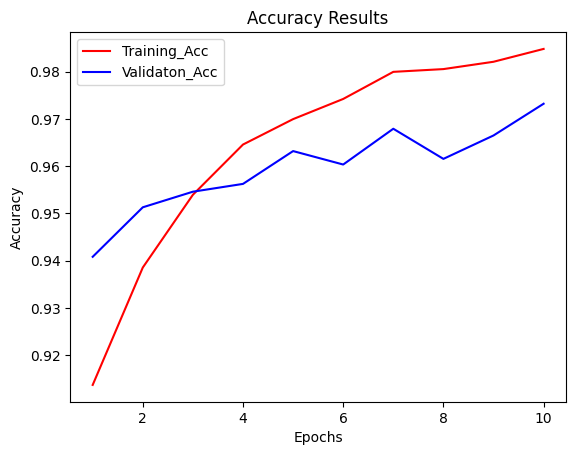

In [25]:
epochs=np.arange(1,11)
plt.plot(epochs,training_history.history["accuracy"],color="red",label="Training_Acc")
plt.plot(epochs,training_history.history["val_accuracy"],color="blue",label="Validaton_Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Results")
plt.legend()
plt.show()

### Other Methods for Model Evaluation

In [26]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [27]:
#since data is arranged in sequential manner we are using validation_set as test_set
test_set=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step


(array([[1.0000000e+00, 1.4731580e-09, 7.3932646e-13, ..., 6.3915150e-18,
         5.2863181e-17, 3.1502545e-16],
        [9.9999988e-01, 3.8408443e-10, 2.2622090e-14, ..., 8.2299994e-19,
         1.1757934e-19, 1.0936349e-17],
        [1.0000000e+00, 1.3907607e-12, 3.1111715e-13, ..., 4.3842630e-19,
         9.1253705e-17, 7.5822477e-16],
        ...,
        [8.2968597e-12, 2.6098615e-12, 2.2075832e-07, ..., 2.4405267e-12,
         1.8599297e-12, 9.9992979e-01],
        [1.2235019e-10, 8.0589476e-12, 1.5892304e-08, ..., 2.9091106e-11,
         1.8969449e-11, 9.9999905e-01],
        [3.5026371e-17, 2.4384151e-18, 8.3215911e-17, ..., 2.9018678e-20,
         1.4031995e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [29]:
#axis=1 means give the index of the max value on checking column wise -->give one index for every row
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [30]:
#axis=0 give data row wise
true_categories=tf.concat([y for x,y in test_set],axis=0)
print(true_categories)

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(17572, 38), dtype=float32)


In [31]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### Calculating Precision,Recall

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       0.94      1.00      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.94      0.99      0.97       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.95      0.

### Calculating confusion matrix

In [36]:
con_mat=confusion_matrix(Y_true,predicted_categories)
con_mat.shape
##confusion -->38 predict values and 38 true values

(38, 38)

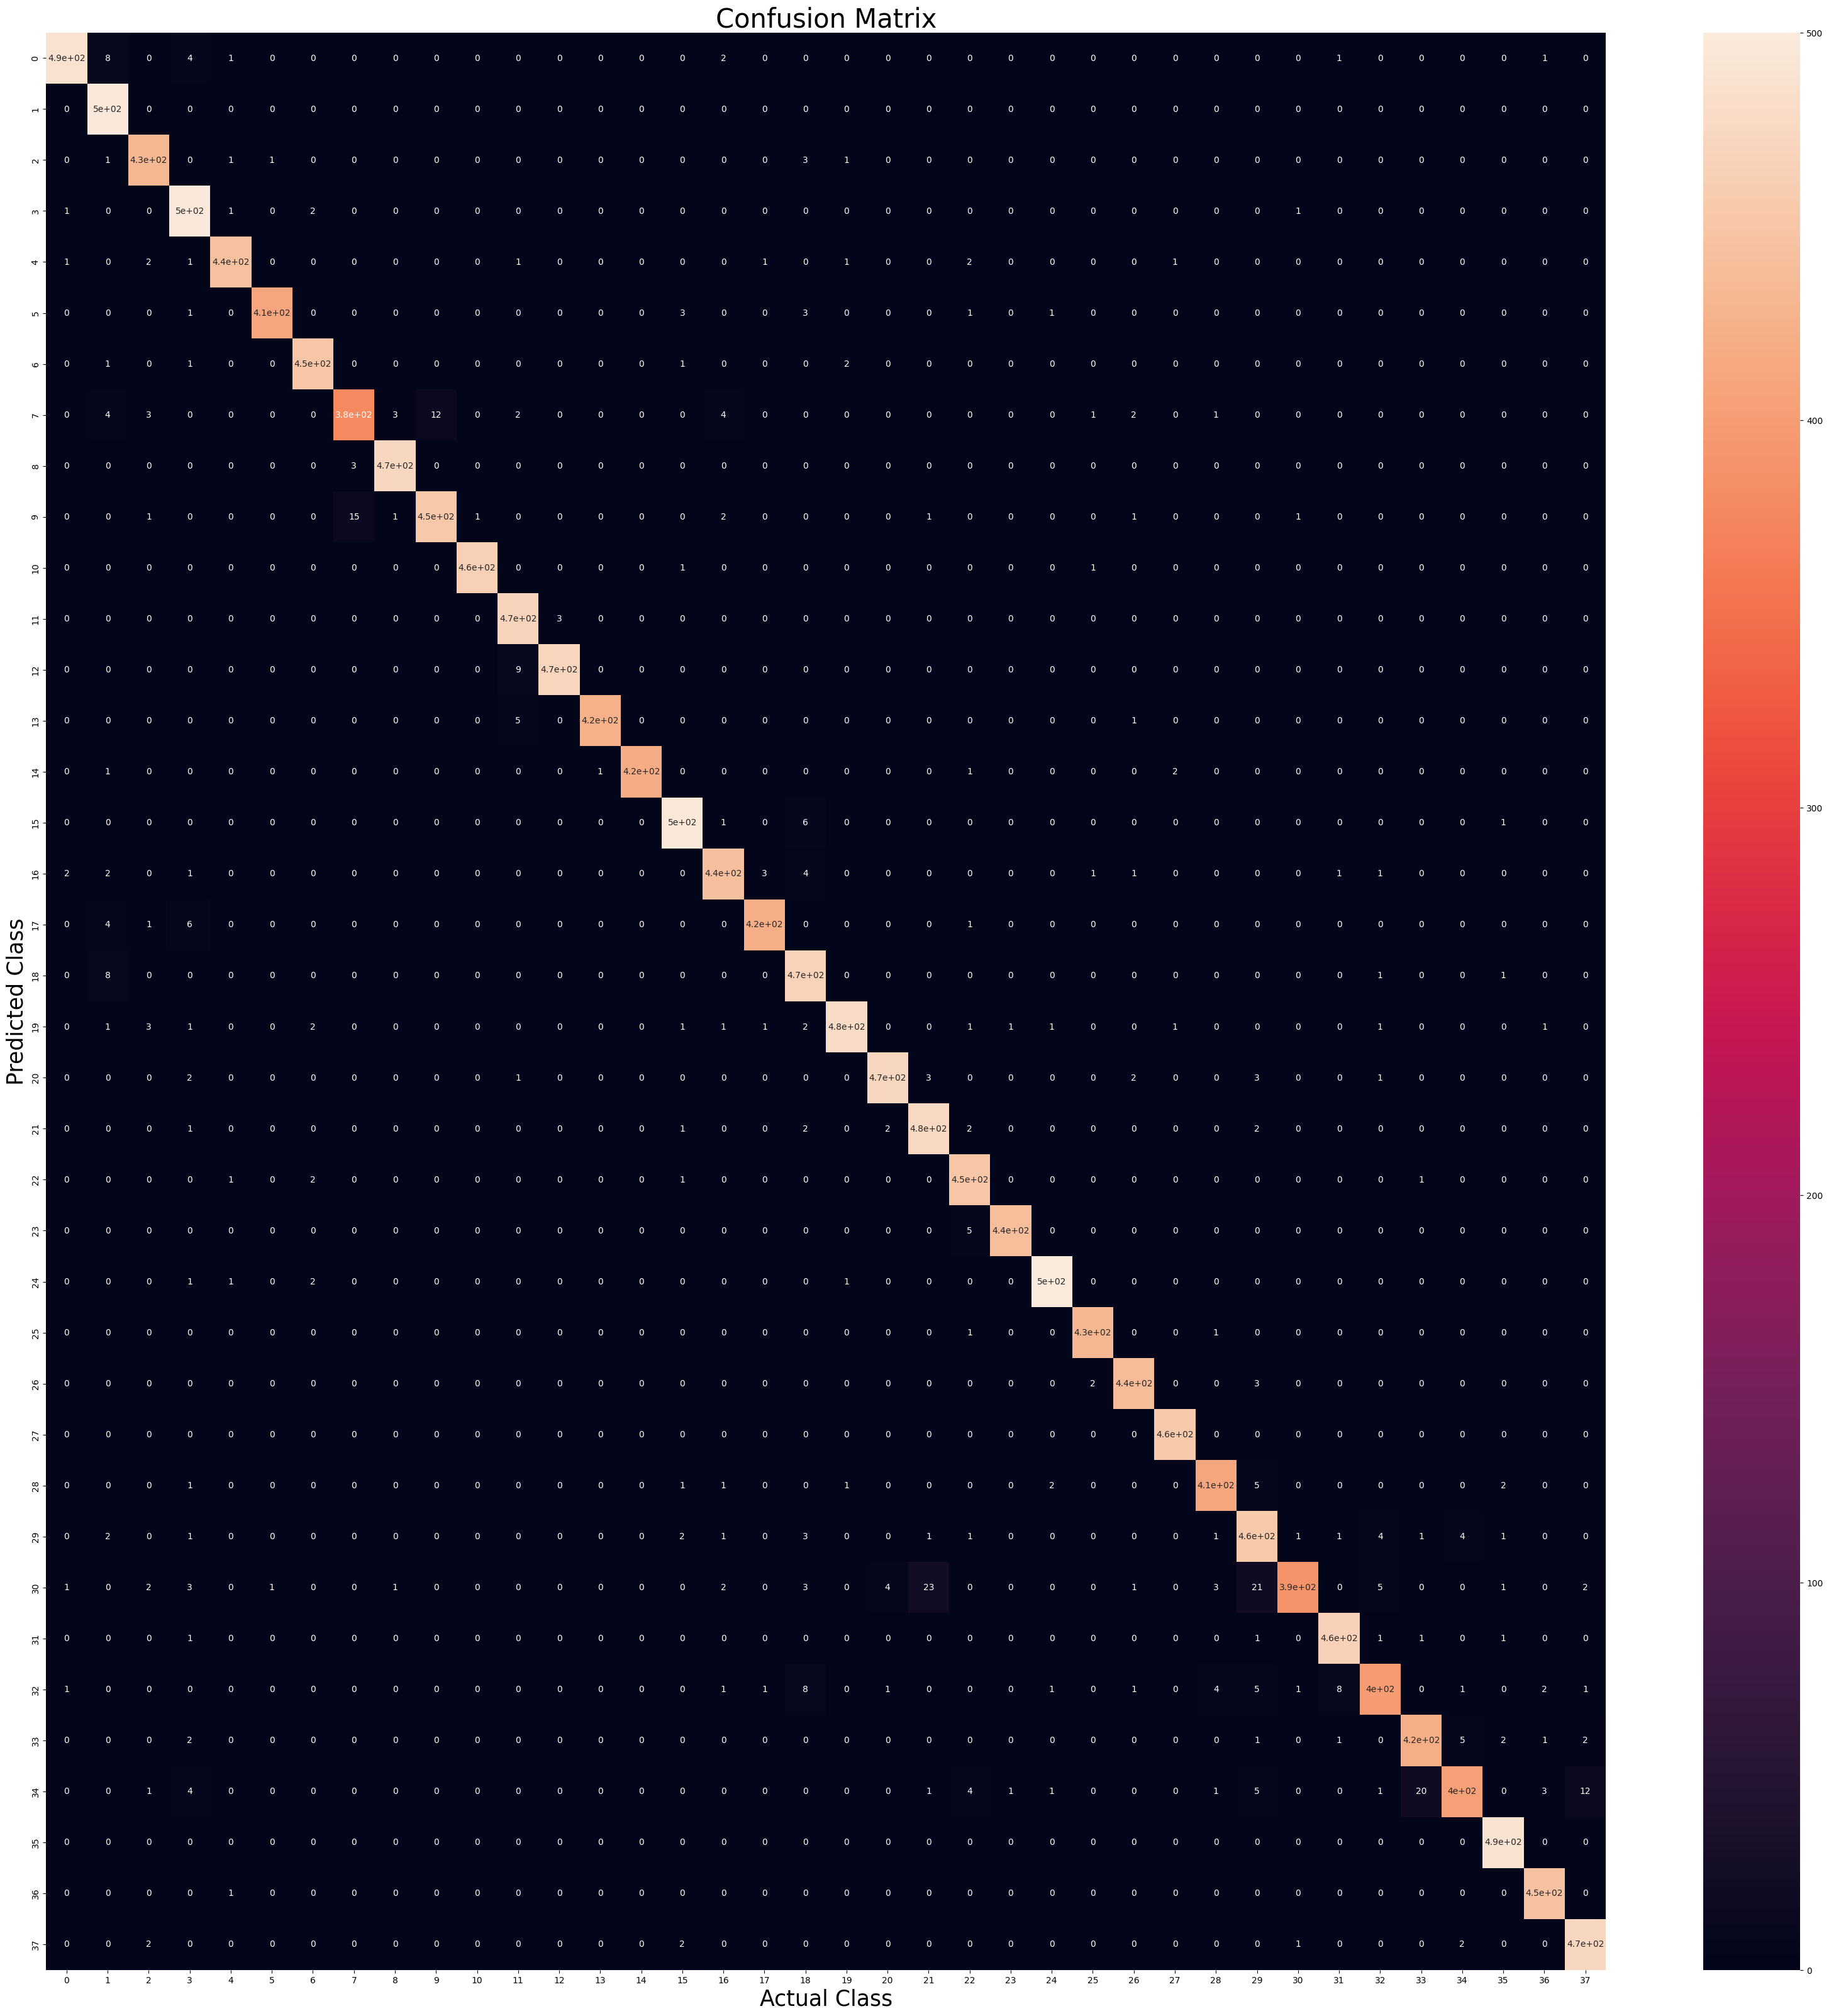

In [49]:
plt.figure(figsize=(40,40))
sns.heatmap(con_mat,annot=True,annot_kws={"size":10})
plt.xlabel("Actual Class",fontsize=25)
plt.ylabel("Predicted Class",fontsize=25)
plt.title("Confusion Matrix",fontsize=30)
plt.show()